In [11]:
from data.generic.segmentation import GenericSegmentation
from utils.augmentation import *
import matplotlib.pyplot as plt

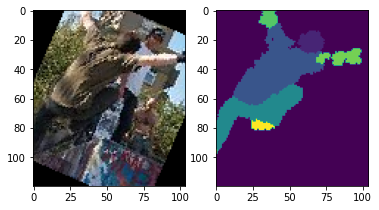

In [43]:
transform = BiCompose([
    SyncRandomRotation((-45, 45)),
])

dataset = GenericSegmentation('test/datasets/lip', 'train', transform=transform)
img, seg = dataset.__getitem__(1)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(seg)